<a href="https://colab.research.google.com/github/MohammedSaudh/Bike_Sharing_Demand_Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
#importing data analysis and visualisation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
"%matpotlib inline"

'%matpotlib inline'

In [2]:
#import library for modelling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
sns.set_style('whitegrid', {'grid.linestyle': '--'})
#import library to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [10]:
#mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
#reading data
seoul_bike_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/Bike Sharing Demand Prediction/data/SeoulBikeData.csv', encoding='latin1')

In [17]:
#getting first peak into the data
seoul_bike_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [20]:
#checking number of rows and columns
seoul_bike_data.shape

(8760, 14)

In [18]:
#Checking all column names
seoul_bike_data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [19]:
#Checking column infos
seoul_bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [21]:
#We will write a function 'printinfo' to display some attributes like Data Type, No.Of null values and No.Of Unique values of each column 
def printinfo():
    temp = pd.DataFrame(index = seoul_bike_data.columns)
    temp['Data Type'] = seoul_bike_data.dtypes
    temp['Null Count'] = seoul_bike_data.isnull().sum()
    temp['Unique Count'] = seoul_bike_data.nunique()
    return temp

In [22]:
printinfo()

,Data Type,Null Count,Unique Count
Date,object,0,365
Rented Bike Count,int64,0,2166
Hour,int64,0,24
Temperature(°C),float64,0,546
Humidity(%),int64,0,90
Wind speed (m/s),float64,0,65
Visibility (10m),int64,0,1789
Dew point temperature(°C),float64,0,556
Solar Radiation (MJ/m2),float64,0,345
Rainfall(mm),float64,0,61


In [23]:
#Viewing statistical indicators for numerical columns
seoul_bike_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [26]:
#Converting Date column to datetime object and extracting day of the Week and Month From the column
seoul_bike_data['Date'] = pd.to_datetime(seoul_bike_data['Date'])
seoul_bike_data['month'] = seoul_bike_data['Date'].apply(lambda x: x.month)
seoul_bike_data['Day of week'] = seoul_bike_data['Date'].dt.day_name()
seoul_bike_data['weekdays_weeekend'] = seoul_bike_data['Day of week'].apply(lambda x: 1 if x=='Saturday' or x == 'Sunday' else 0)

In [27]:
#Dropping Date, Day of week columns as we have already extracted necessary information from them
seoul_bike_data.drop(columns = ['Date', 'Day of week'], axis =1, inplace=True)

Exploratory Data analysis:

Text(0.5, 1.0, 'Average bikes rented per month')

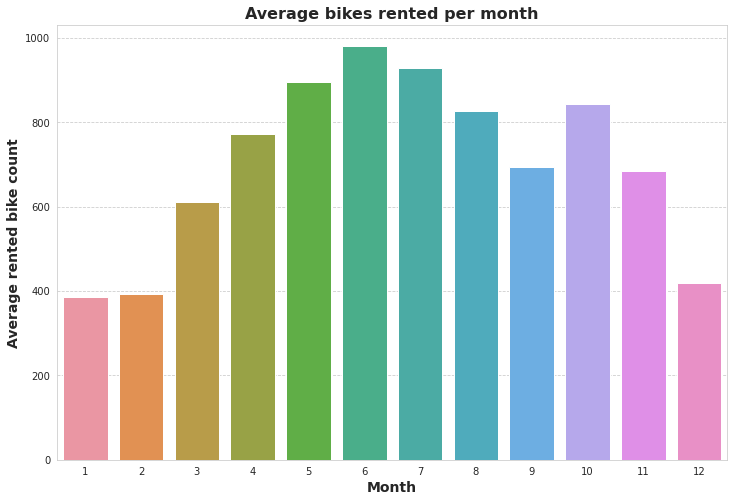

In [28]:
#Checking average count of rented bikes per month
monthly_avg_data = seoul_bike_data.groupby('month')['Rented Bike Count'].mean()
monthly_avg_data = monthly_avg_data.reset_index()
plt.figure(figsize=(12,8))
sns.barplot(x='month', y= 'Rented Bike Count', data= monthly_avg_data)
plt.xlabel('Month' ,fontweight='bold', size=14)
plt.ylabel('Average rented bike count',fontweight='bold', size=14 )
plt.title('Average bikes rented per month', fontweight='bold', size=16)

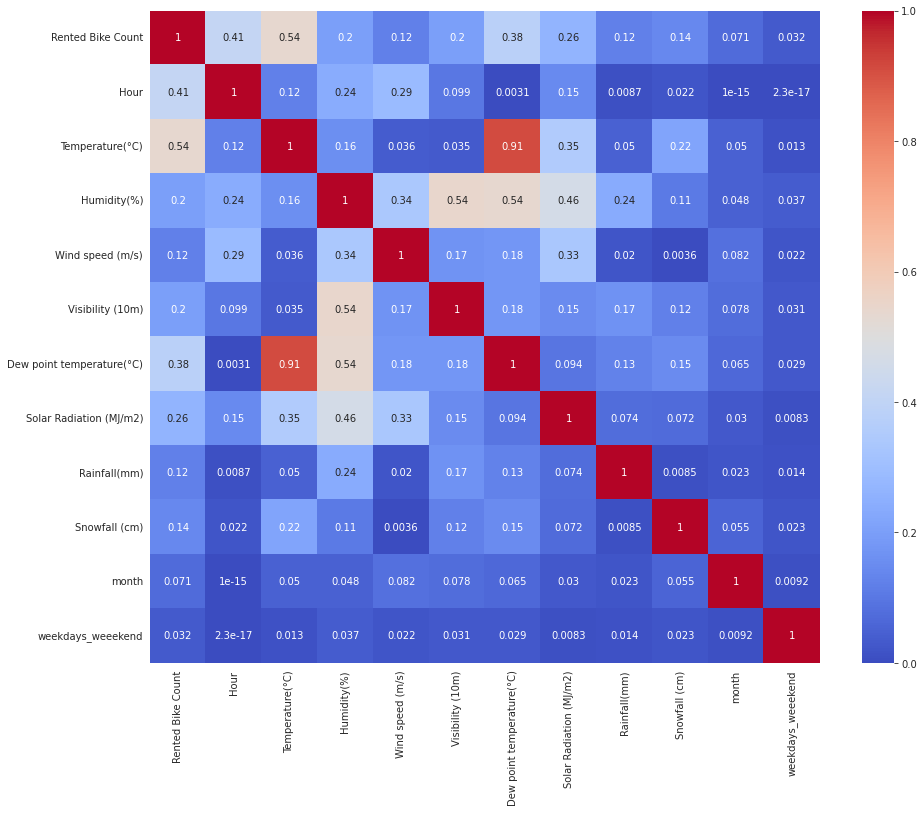

In [29]:
#Checking correlation between numerical columns
plt.figure(figsize=(15,12))
correlation = seoul_bike_data.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm');

In [30]:
#importing function to calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
#creating a function to calculate VIF
def calc_vif(X):
    vif = pd.DataFrame()
    vif["Feature"] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [32]:
calc_vif(seoul_bike_data[[i for i in seoul_bike_data.describe().columns if i not in ['Rented Bike Count']]])

,Feature,VIF
0,Hour,4.424147
1,Temperature(°C),34.331857
2,Humidity(%),6.973710
3,Wind speed (m/s),4.835871
4,Visibility (10m),9.309721
5,Dew point temperature(°C),17.758961
6,Solar Radiation (MJ/m2),2.881777
7,Rainfall(mm),1.082987
8,Snowfall (cm),1.125842
9,month,4.690212


From the above table we see that Temperature and Dew point temperature have high VIF values(>9), from the correlation table we can see that these two features have very high correlation(0.91) 

In [34]:
#recalculating VIF by dropping one of the two columns with high VIF
calc_vif(seoul_bike_data[[i for i in seoul_bike_data.describe().columns if i not in ['Rented Bike Count', 'Dew point temperature(°C)']]])

,Feature,VIF
0,Hour,3.961874
1,Temperature(°C),3.236809
2,Humidity(%),6.114153
3,Wind speed (m/s),4.616621
4,Visibility (10m),5.404128
5,Solar Radiation (MJ/m2),2.272068
6,Rainfall(mm),1.081252
7,Snowfall (cm),1.125304
8,month,4.580307
9,weekdays_weeekend,1.399708


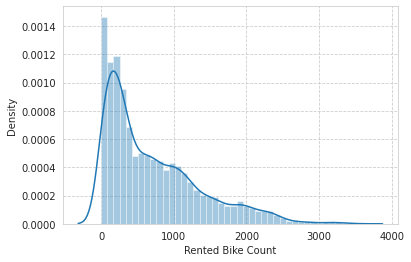

In [35]:
#Checking the distribution for the Dependent variable('Rented Bike Count')
sns.distplot(seoul_bike_data['Rented Bike Count'])

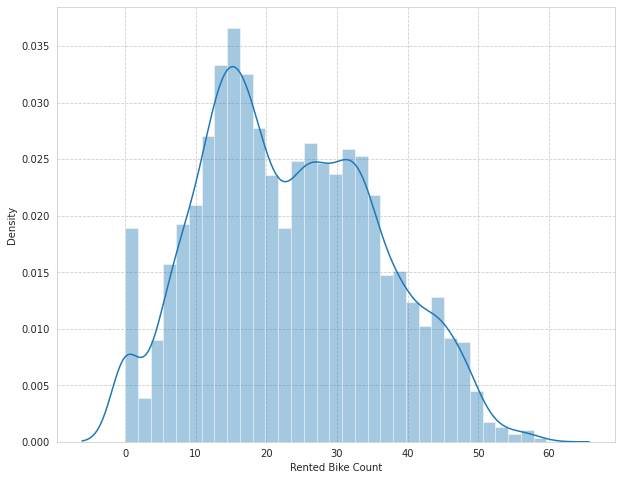

In [36]:
#Since the data is right skewed, we will apply square root tansformation and chec distribution again
plt.figure(figsize=(10,8))
sns.distplot(np.sqrt(seoul_bike_data['Rented Bike Count']))

We can see that after applying square root transformation the data somewhat resembles a normal distribution

Exploring Numerical features



In [37]:
#Creating a database out of just the numerical features
numeric_features = seoul_bike_data.select_dtypes(exclude='object')

In [39]:
#Checking datatype of all columns in numerical features
numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  month                      8760 non-null   int64  
 11  weekdays_weeekend          8760 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 821.4 KB


In [40]:
#Checking Statistical indicators for all numeric features
numeric_features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [41]:
numeric_features.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,weekdays_weeekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,0


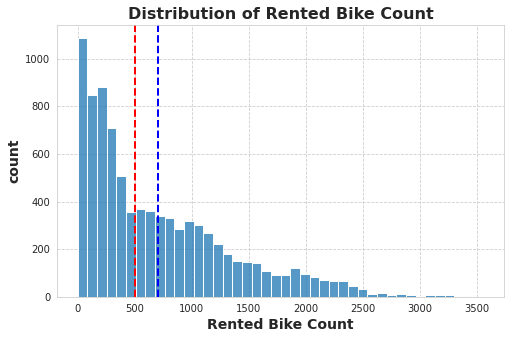

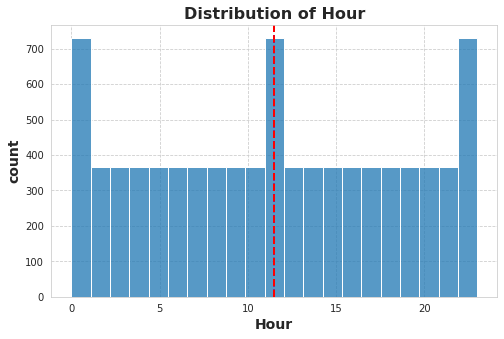

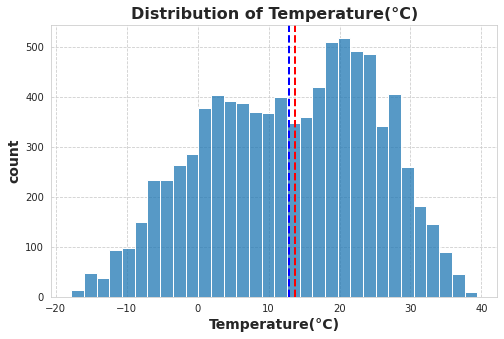

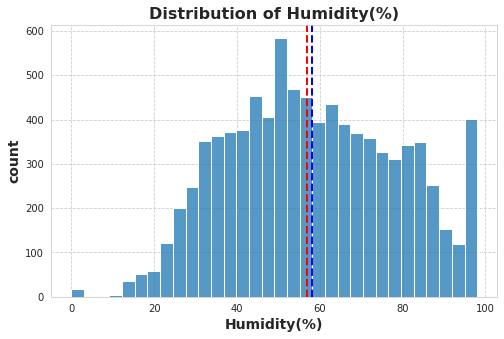

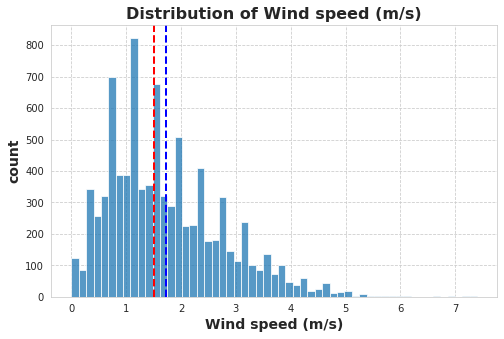

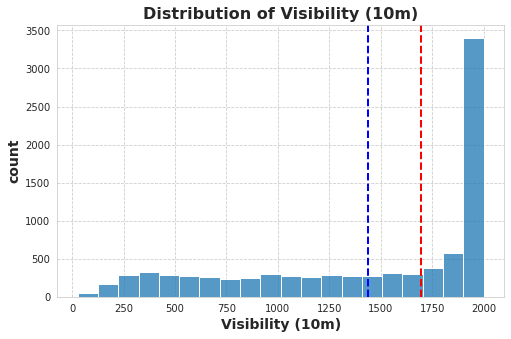

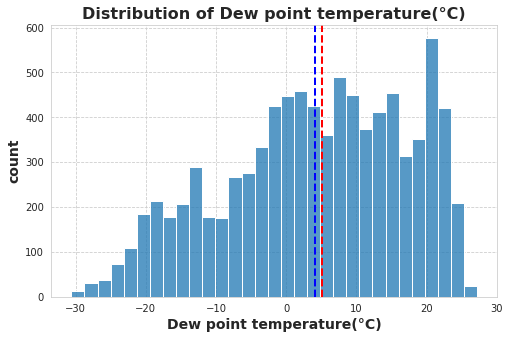

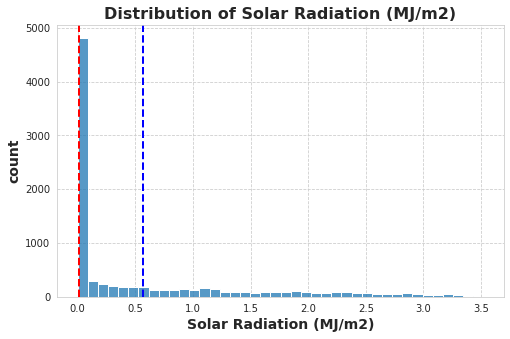

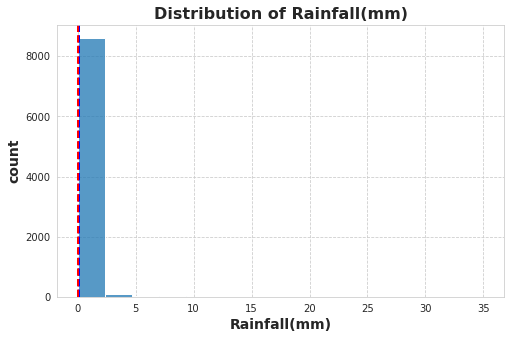

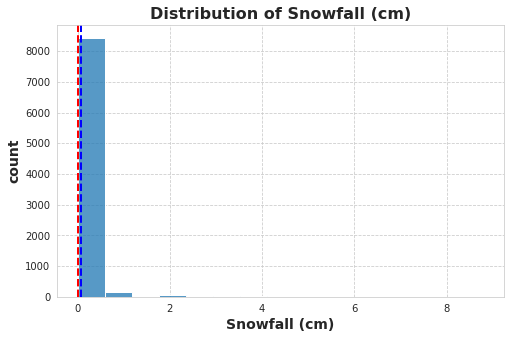

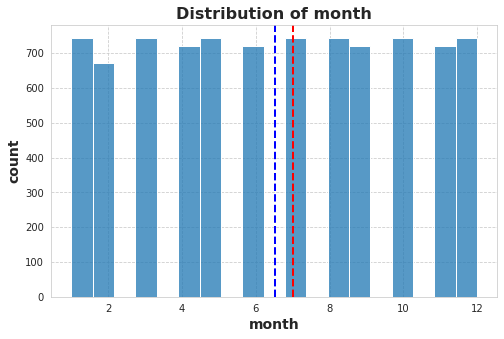

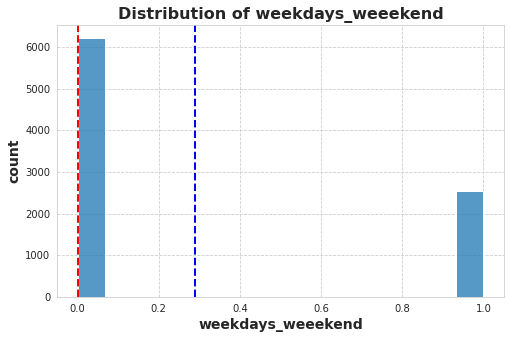

In [43]:
#Plotting distribution plots for all numerical features.
for col in numeric_features[:]:
    if col == 'Date':
        pass
    else:
        plt.figure(figsize=(8,5))
        sns.histplot(seoul_bike_data[col])
        plt.axvline(seoul_bike_data[col].mean(), color='blue', linestyle = 'dashed', linewidth  = 2)
        plt.axvline(seoul_bike_data[col].median(), color='red', linestyle = 'dashed', linewidth  = 2)
        plt.xlabel(col, fontweight='bold', size=14)
        plt.ylabel('count', fontweight='bold', size=14)
        plt.title('Distribution of '+col, fontweight='bold', size=16)
        plt.show()

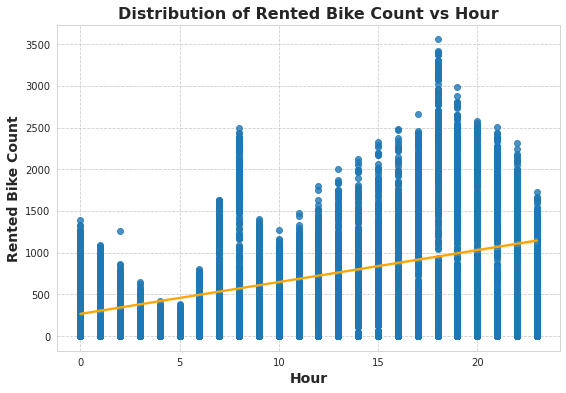

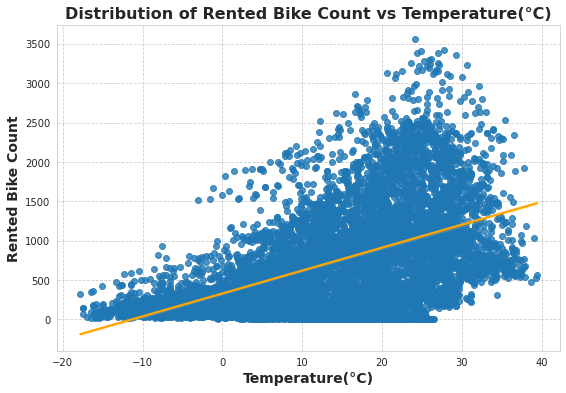

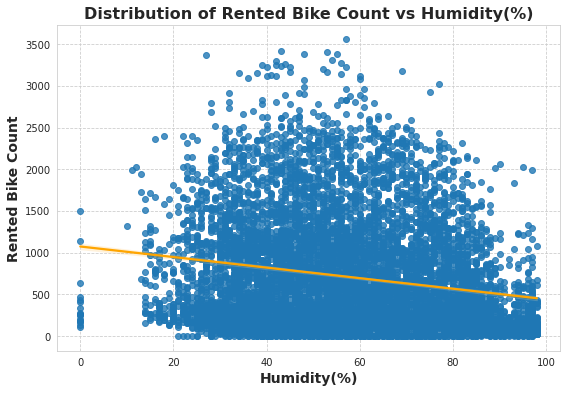

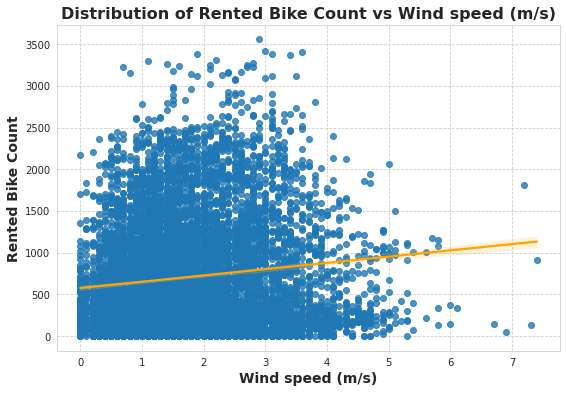

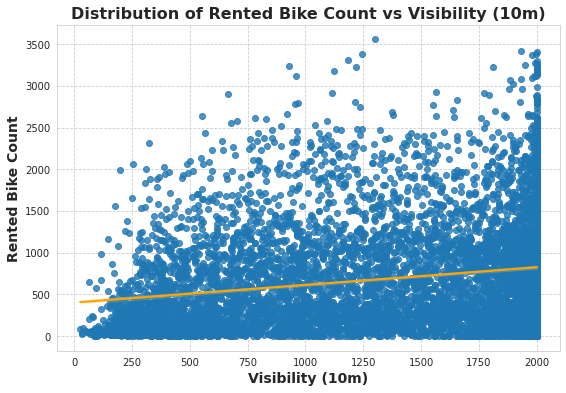

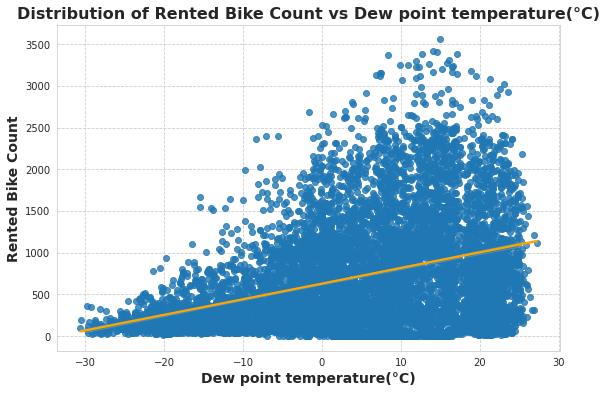

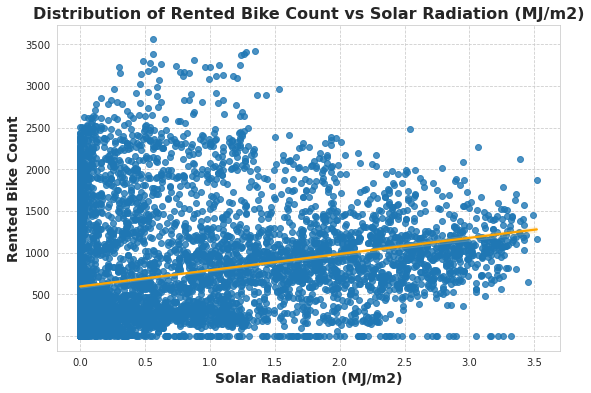

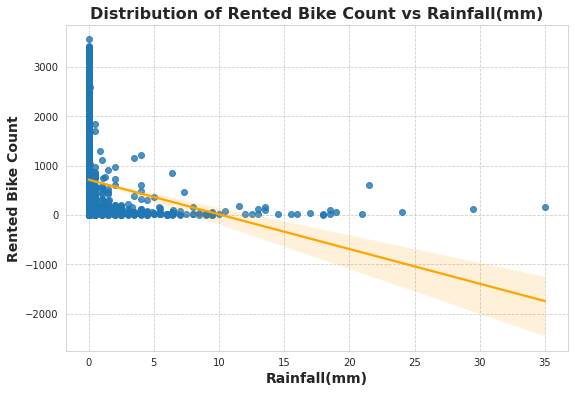

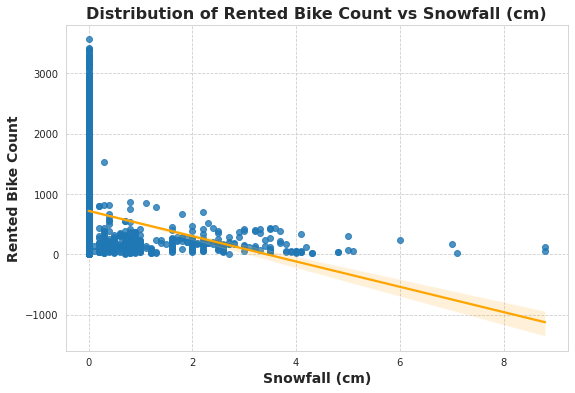

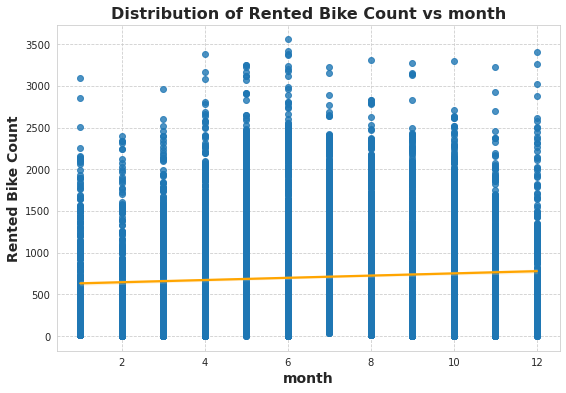

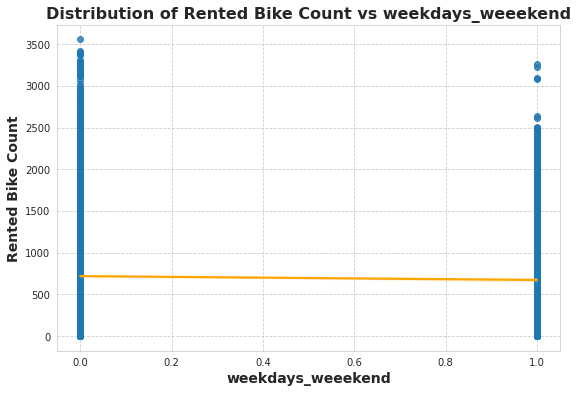

In [44]:
#plotting distribution of all numerical features against the dependant variable i.e "Rented Bike Count"
for col in numeric_features[:]:
    if col == 'Rented Bike Count':
        pass
    else:
        plt.figure(figsize=(9,6))
        sns.regplot(x = seoul_bike_data[col], y = seoul_bike_data['Rented Bike Count'], line_kws={'color': "orange"})
        plt.xlabel(col, fontweight='bold', size=14)
        plt.ylabel('Rented Bike Count', fontweight='bold', size=14)
        plt.title('Distribution of Rented Bike Count vs '+col, fontweight='bold', size=16)
    plt.show()

Exploring Categorical features


In [45]:
#Creating a database of categorical features.
categorical_features = seoul_bike_data.select_dtypes(include='object')

In [46]:
categorical_features.head()

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes


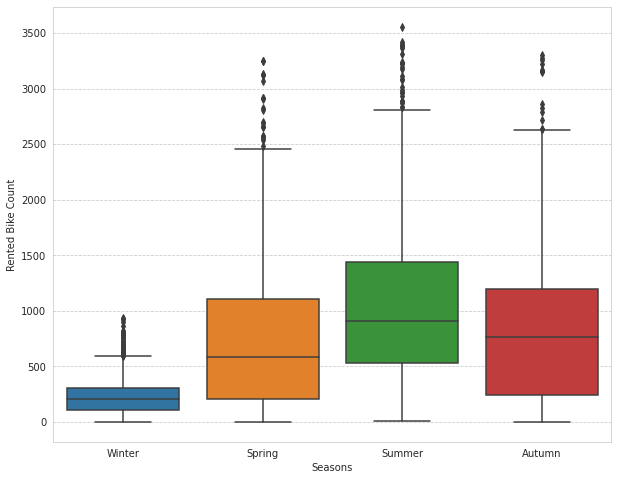

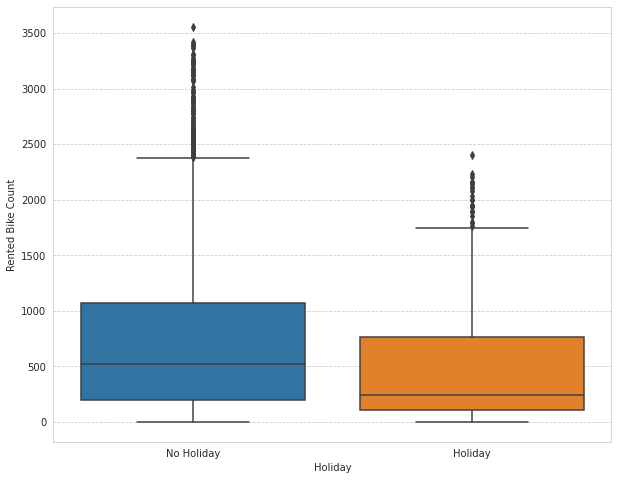

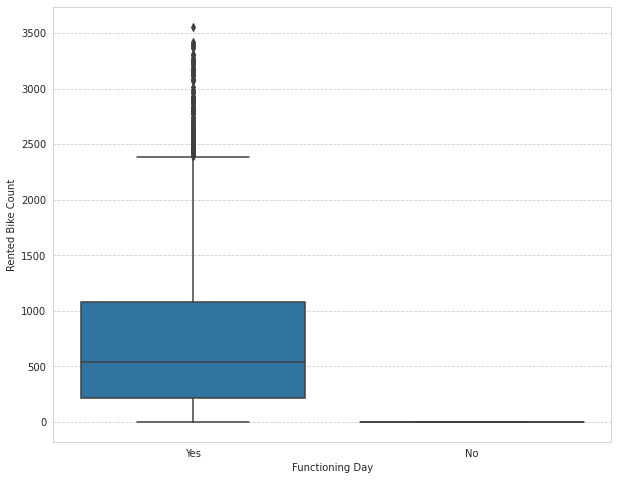

In [47]:
#Creating boxplots for the dependant variable i.e 'Rented Bike Count' against all categorical variables
for col in categorical_features[:]:
    plt.figure(figsize=(10,8))
    sns.boxplot(x = seoul_bike_data[col], y=seoul_bike_data['Rented Bike Count'])
    plt.show()